In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings

from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer


In [ ]:
cancer = load_breast_cancer()


In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
pca = PCA(n_components=30)
pca.fit(x_scaled)



PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(x_scaled) 

In [ ]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
variance = []

for i in range(0,30): #karena n_componen = 30
  variance.append(np.var(x_pca[:,i]))


In [ ]:
variance

[13.281607682257906,
 5.691354613209926,
 2.8179489772294146,
 1.9806404746410426,
 1.6487305477038798,
 1.2073566119650039,
 0.6752201138947517,
 0.4766171400063984,
 0.416894812367733,
 0.35069345682394465,
 0.2939156962794054,
 0.26116137022136493,
 0.24135749615901908,
 0.15700972364779064,
 0.09413496502882185,
 0.07986280095456945,
 0.059399037759728136,
 0.052618783506790806,
 0.049477591776754946,
 0.031159402450161137,
 0.02997289391100759,
 0.027439402531630377,
 0.024340837766973183,
 0.018055007000150138,
 0.015481271374955625,
 0.008177639864325018,
 0.006900463875178935,
 0.0015893378711428314,
 0.000748803097406297,
 0.00013304482282100528]

In [ ]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))


information extracted 63.24320765155944 %


In [ ]:
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [ ]:
x_scaled.shape

(569, 30)

In [ ]:
x_pca.shape

(569, 2)

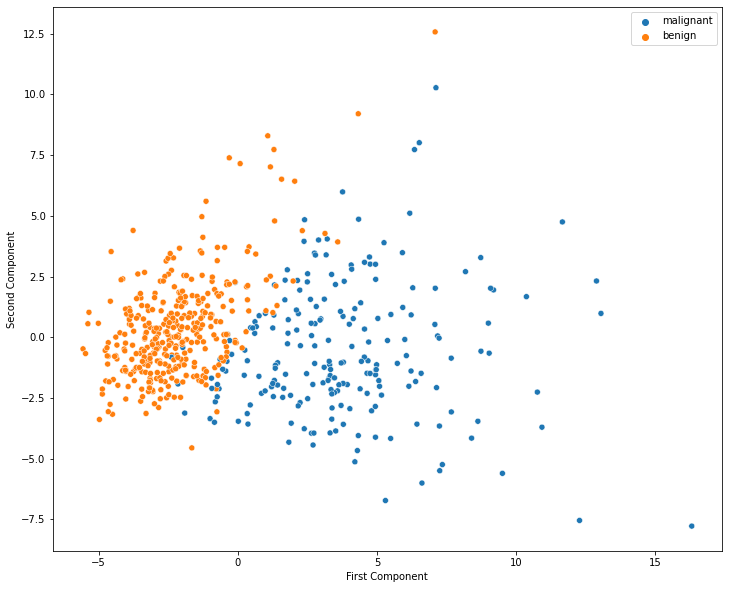

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(
    x_pca[:,0], x_pca[:,1], hue=np.where(cancer.target,'benign','malignant')
)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [ ]:
blobs = make_blobs()


In [ ]:
X,y = make_blobs(n_samples=200, centers=3, n_features= 2)

In [ ]:
print(X.shape,y.shape)

(200, 2) (200,)


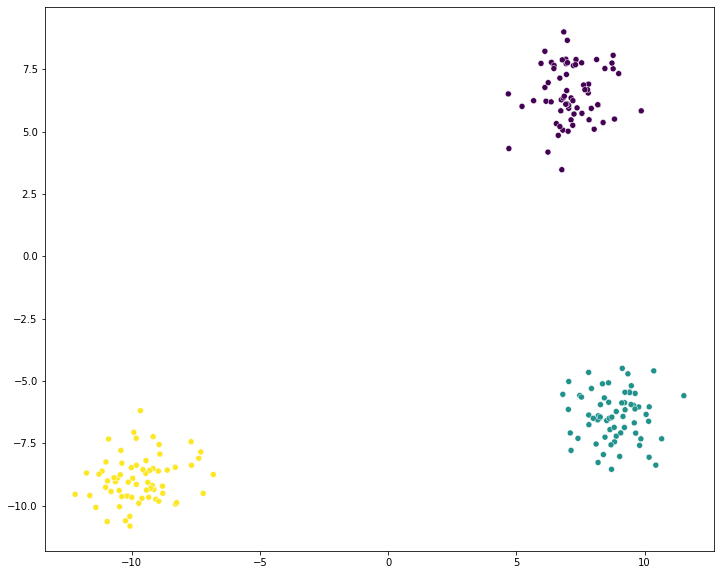

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(X[:,0],X[:,1], c=y)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 7.14011209  6.5234535 ]
 [-9.70822905 -8.92755609]
 [ 8.83234346 -6.40042823]]
[2 1 0 0 2 1 2 2 2 1 0 0 1 0 2 2 2 2 0 0 2 2 2 1 0 0 2 1 2 0 0 0 0 2 0 2 2
 1 2 0 2 0 2 1 0 2 2 0 1 1 0 2 2 2 1 0 1 1 2 0 0 1 1 0 1 2 0 2 1 1 2 2 1 1
 0 2 1 1 0 1 1 1 0 2 1 1 2 2 2 2 2 1 2 0 2 1 1 0 2 2 0 1 2 1 2 1 1 0 1 1 0
 2 1 1 2 2 1 0 1 2 0 0 2 1 1 2 2 0 1 0 0 1 0 2 1 1 0 0 0 1 2 1 1 2 0 1 2 1
 0 1 1 0 2 0 2 0 0 0 0 2 0 2 0 1 1 0 0 1 0 2 1 1 2 0 0 0 2 0 0 0 0 2 1 0 0
 2 1 0 2 2 2 0 1 1 1 1 2 1 1 0]


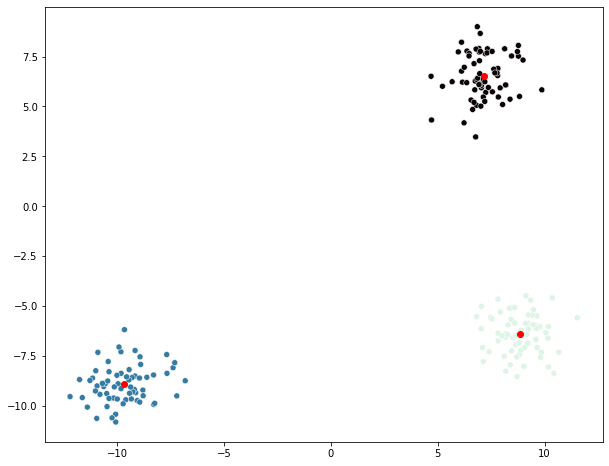

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(X[:,0],X[:,1],c=kmeans.labels_, cmap='mako')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='red')

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
ilus = pd.read_csv('ilustrasi k means.csv', sep=';')

FileNotFoundError: ignored

In [ ]:
ilus

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= ilus,x='tinggibadan',y='tinggibadanistri', cmap='mako')


ELBOW METHOD

In [ ]:
n_of_clusters = range(2,11)
clustering = [KMeans(n_clusters = k).fit(ilus) for k in n_of_clusters]
clustering

In [ ]:
centroid = [k.cluster_centers_ for k in clustering]
len(centroid)

In [ ]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(ilus)
label = kmeans.labels_
silhouette_score(ilus,label,metric='euclidean')

In [ ]:
silhouette_scores = []
number_of_cluster = range(2,11)
for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(ilus)
  label = kmeans.labels_
  silhouette_scores.append(silhouette_score(ilus,label,metric='euclidean'))


In [ ]:
#finding optimal number of cluster

plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster,silhouette_scores)
sns.scatterplot(number_of_cluster,silhouette_scores)
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(ilus)
ilus['cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='cluster', data=ilus, palette='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c='red')
plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')
plt.show()